# Salary Predictions Based on Job Descriptions

## Goal
- The goal of this project is to predict the future employee salaries based on the real data (online job board) of current employees slaries which is dependent on the parameters like "company", "job title", "education",  work experience". </p>


## Table of Contents

DISCOVER
Import libraries <br>

Load the data <br>

Clean the data 
- Inspection of data: Missing values, data types, duplicates, summary statistics <br>

Explore the data (EDA)
- Correlation of numeric features
- Distribution of numeric feature
- Plots of numeric features against salary
- Boxplots of categorical features and salary <br>

Removal of potential outliers

Saving cleaned data



## Discover 

In [1]:
""" Goal of this script is to load, explores, and visualizes the salary prediction datasets """

__author__ = "Robin Yadav"
__email__ = "yrobins95@gmail.com"

### Import libraries

In [2]:
""" importing libraries """

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
%matplotlib inline

""" Importing function from files """
import import_ipynb
import plot_job_features
from plot_job_features import plot_features

importing Jupyter notebook from plot_job_features.ipynb


### Load the datasets

In [3]:
""" 
    - load the data into a Pandas dataframe
    - Information of the dataset 
"""

## load the train features data##
train_features_df = pd.read_csv('data-SalaryPredictions/data/train_features.csv')

## load the target variable ##
train_target_df = pd.read_csv('data-SalaryPredictions/data/train_salaries.csv')

## Train dataframe: Merging train features dataframe and target(salary) dataframe ##
train_df = pd.merge(train_features_df, train_target_df, on = 'jobId') # jobID columns in both dfs

## Information of the train dataset 
print("Number of records (rows) Datasets: ", train_df.shape[0])
print("Number of features (columns) Dataset: ", train_df.shape[1])
print("\nColumns names of the dataset: \n", train_df.columns.tolist())
print("\nFirst 5 records of the dataset: ")
display(train_df.head())
print("\n\n\nDataset Information: ")
display(train_df.info())



## Examine the test features data ##
test_features_df = pd.read_csv('data-SalaryPredictions/data/test_features.csv')

## Information of the test dataset 
print("Number of records (rows) Datasets: ", test_features_df.shape[0])
print("Number of features (columns) Dataset: ", test_features_df.shape[1])
print("\nColumns names of the dataset: \n", test_features_df.columns.tolist())
print("\nFirst 5 records of the dataset: ")
display(test_features_df.head())
print("\n\n\nDataset Information: ")
display(test_features_df.info())



Number of records (rows) Datasets:  1000000
Number of features (columns) Dataset:  9

Columns names of the dataset: 
 ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis', 'salary']

First 5 records of the dataset: 


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163





Dataset Information: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


None

Number of records (rows) Datasets:  1000000
Number of features (columns) Dataset:  8

Columns names of the dataset: 
 ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']

First 5 records of the dataset: 


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44





Dataset Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


None

## Clean the data: 
### Data Wrangling
**Data Wrangling is the process of converting data from the initial format to a format that may be better for analysis.**

<ul>
    <li>Identify and handle missing values
        <ul>
            <li>Nested Identify missing values</li>
            <li>Nested Deal with missing values</li>
            <li>Nested Correct data format</li>
        </ul>
    </li>
    <li>Data standardization</li>
    <li>Data Normalization (centering/scaling)</li>
    <li>Binning</li>
    <li>Indicator variable</li>
</ul>

**Identify the missing data**
<p> We can replace "missing data" with NaN (Not a Number), which is Python's default missing value marker. <br>
  .replace(A, B, inplace = True)  <br>
    to replace A by B </p>

In [4]:
""" 
    For example: 
    if dataframe contains "?", then we can replace "?" to NaN
"""

train_df.replace("?", np.nan, inplace = True)
train_df.head()


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


**Evaluating for Missing Value**
<p> 
The missing values are converted to Python's default. We use Python's built-in functions to identify these missing values. There are two methods to detect missing data:

    1 .isnull()
    2 .notnull()
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data. </p>

In [5]:
# count the number of missing data and then proceed
missing_data = train_df.isnull()
print("Below Results shows there are no missing data in first 5 samples (or rows) ")
display(missing_data.head())

Below Results shows there are no missing data in first 5 samples (or rows) 


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


<p>True means "missing data" and False means "not missing data" </p>

<br>

**It is always prefered to know the missing data in the datasets**
<p>We can count the missing data in each columns as illustrated in following steps: </p>

In [6]:
# checking the columns header
missing_data.columns.values.tolist()

['jobId',
 'companyId',
 'jobType',
 'degree',
 'major',
 'industry',
 'yearsExperience',
 'milesFromMetropolis',
 'salary']

In [7]:
for column in missing_data.columns.values.tolist():
    print(column)
    display(missing_data[column].value_counts())
    print("")

jobId


False    1000000
Name: jobId, dtype: int64


companyId


False    1000000
Name: companyId, dtype: int64


jobType


False    1000000
Name: jobType, dtype: int64


degree


False    1000000
Name: degree, dtype: int64


major


False    1000000
Name: major, dtype: int64


industry


False    1000000
Name: industry, dtype: int64


yearsExperience


False    1000000
Name: yearsExperience, dtype: int64


milesFromMetropolis


False    1000000
Name: milesFromMetropolis, dtype: int64


salary


False    1000000
Name: salary, dtype: int64

<p>Above results shows that there are no missing data in job predictions datasets <br>
    <br>
</p>

#### Assume there are missing data in the above datasets. How to manage those missing data?

1. drop data <br> 
    a. drop the whole row  - It is prefer to drop whole row only if there are lots of missing data<br>
    b. drop the whole column - It is prefer to drop whole coulmn only if there are lots of missing data <br>
2. replace data - It is prefer to replace data if there are few missing data <br>
    a. replace it by mean <br>
    b. replace it by frequency <br>
    c. replace it based on other functions <br>
    <br>
    
#### Example :
avg_COLNAME = df['COLUMNNAME'].astype('float').mean(axis=0) <br>
print("Average of COLNAME:", avg_COLNAME) <br>
df['COLUMNNAME'].replace(np.nan, avg_COLNAME, inplace=True) <br>

**Note: Rows and columns can also be replaced by frequency by counting the maximum number of occurence of the items in the column or row**

#### Correct data format <br>
It is really important to know and correct data format (int, float, text or other). <br>

In Pandas, we use <br>
.dtype() to check the data type <br>
.astype() to change the data type <br>

In [8]:
train_df.dtypes

jobId                  object
companyId              object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
salary                  int64
dtype: object

From above it is found that all the data types are in correct format <br>
#### What if the data are not in correct format? <br>

#### Example: <br>
df[["ColumnName1", "ColumnName2"]] = df[["ColumnName1", "ColumnName2"]].astype("float") <br>
df[["ColumnName3"]] = df[["ColumnName3"]].astype("int")

In [9]:
""" look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it """

### Check for duplicate ###
display(train_df.duplicated().sum())
display(test_features_df.duplicated().sum())


""" Remove duplicate rows from train_data and test_data """
def remove_duplicate(df):
    print("\nDimension of dataset before removing duplicates: ", df.shape)
    df = df.drop_duplicates(keep='first')
    print("\nDimension of dataset after removing duplicates: ", df.shape)
    return df

train_df = remove_duplicate(train_df)
display(train_df.head())
test_features_df = remove_duplicate(test_features_df)
display(test_features_df.head())

0

0


Dimension of dataset before removing duplicates:  (1000000, 9)

Dimension of dataset after removing duplicates:  (1000000, 9)


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163



Dimension of dataset before removing duplicates:  (1000000, 8)

Dimension of dataset after removing duplicates:  (1000000, 8)


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


## Explore the data (EDA) 

In [10]:
""" Information: Identify numerical and categorical variables """

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [11]:
train_df.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

### Separating columns with numerical data from categorical data - Useful during modelling 

In [12]:
## Numerical Features ##
num_int_type = train_df.select_dtypes(include='int64').columns.tolist()
num_float_type = train_df.select_dtypes(include='float64').columns.tolist()
num_type = num_int_type + num_float_type
print("\nNumerical types columns name: \n", num_type)

cat_object_type = train_df.select_dtypes(include='object').columns.tolist()
print("\n\nCategorical types columns name: \n", cat_object_type)


Numerical types columns name: 
 ['yearsExperience', 'milesFromMetropolis', 'salary']


Categorical types columns name: 
 ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']


###  Summarize numerical and categorical variables 

In [13]:
train_df[num_type].describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [14]:
train_df[cat_object_type].describe()

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362685213837,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


## Analysis of target variable - 'salary'

In [15]:
""" Visualize the Numerical Features """
def visualize_num_feature(train_df):
    plt.figure(figsize = (14, 6))
    plt.subplot(1,2,1)
    sns.boxplot(train_df)
    plt.subplot(1,2,2)
    sns.distplot(train_df, bins=20)
    plt.show()
 
""" Use IQR rule to identify potential outliers"""
def stat_summary(train_df):
    stat =  train_df.describe()
    print(stat)
    IQR = stat['75%'] - stat['25%']
    upper = stat['75%'] + 1.5 * IQR
    lower = stat['25%'] - 1.5 * IQR
    print('The upper and lower bounds for suspected outliers are {} and {}' .format(upper, lower))
    

Visulaize target varibale (salary)


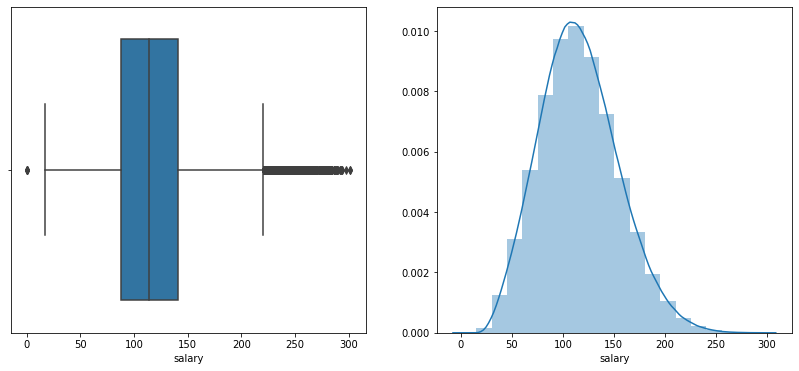

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64
The upper and lower bounds for suspected outliers are 220.5 and 8.5


In [16]:
### salary
print('Visulaize target varibale (salary)')
visualize_num_feature(train_df['salary'])
stat_summary(train_df['salary']) 

## Analysis of Numerical Features with 'Salary'
### Correlation Matrix - Heatmap

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.000000,0.000673,0.375013
milesFromMetropolis,0.000673,1.000000,-0.297666
salary,0.375013,-0.297666,1.000000


 Heat map for categorical columns: 


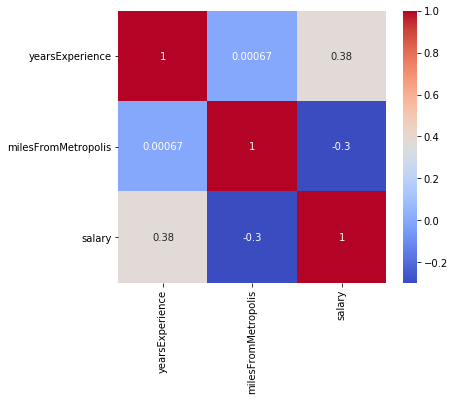

In [17]:
corr_matrix = train_df[num_type].corr()
display(corr_matrix)

print(" Heat map for categorical columns: ")
plt.subplots(figsize=(6,5))
display(sns.heatmap(corr_matrix, annot = True, cmap= 'coolwarm'))

### Line plot
- 'yearsExperience' vs. 'salary'
- 'milesFromMetroplis' vs. 'salary'

In [18]:

def plot_num_feature(df, col):
    if df[col].dtype == 'int64':
        # plot the mean salary for each category and fill between the (mean - std, mean+std)
        mean =  df.groupby(col)['salary'].mean()
        std = df.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values - std.values, mean.values + std.values, \
                        alpha = 0.1)

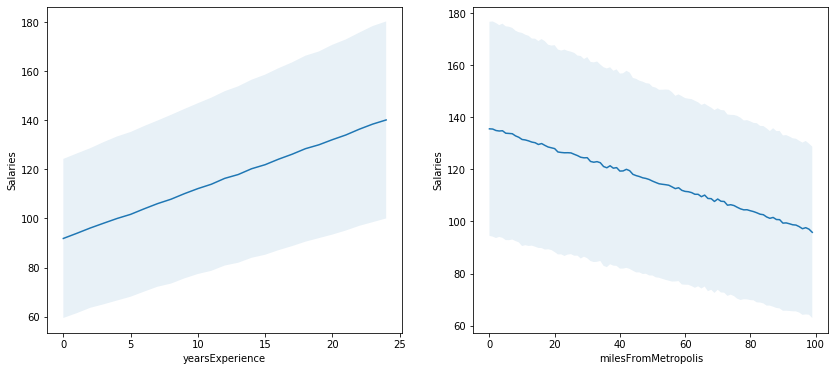

In [19]:

plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
plot_num_feature(train_df, 'yearsExperience')
plt.ylabel('Salaries')
plt.subplot(1, 2, 2)
plot_num_feature(train_df, 'milesFromMetropolis')
plt.ylabel('Salaries')
plt.show()

## Analysis of Categorical Features with 'Salary'

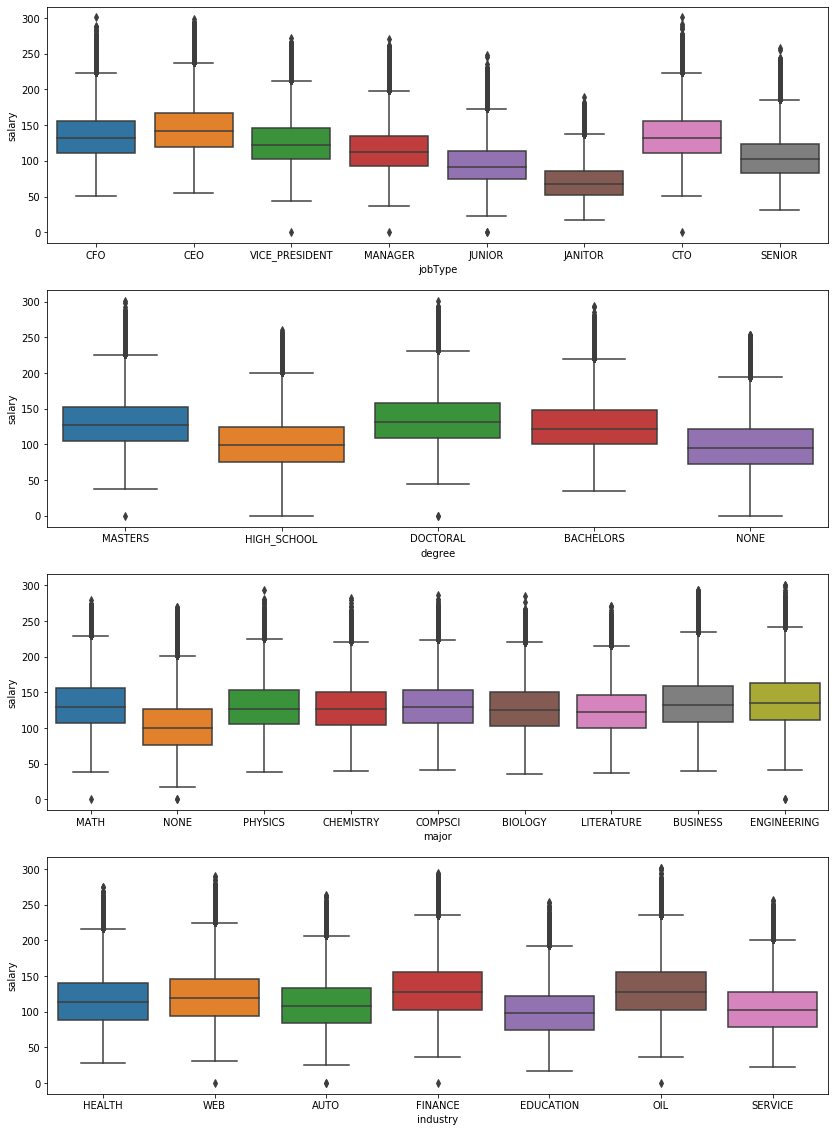

In [20]:

plt.figure(figsize = (14, 20))
plt.subplot(4, 1, 1)
sns.boxplot(y = train_df["salary"], x = train_df["jobType"] )
plt.subplot(4, 1, 2)
sns.boxplot(y = train_df["salary"], x = train_df['degree'] )
plt.subplot(4, 1, 3)
sns.boxplot(y = train_df["salary"], x = train_df['major'] )
plt.subplot(4, 1, 4)
sns.boxplot(y = train_df["salary"], x = train_df['industry'] )
plt.show()

## Analysis of each features

In [21]:
temp_cat = train_df.drop(['jobId', 'companyId', 'yearsExperience', 'milesFromMetropolis', 'salary' ], axis = 1)

for col in temp_cat.columns.tolist():
    print("\n\nFeatures and their Frequencies: \n", train_df[col].value_counts())



Features and their Frequencies: 
 SENIOR            125886
VICE_PRESIDENT    125235
MANAGER           125121
CTO               125046
JANITOR           124971
CEO               124778
JUNIOR            124594
CFO               124369
Name: jobType, dtype: int64


Features and their Frequencies: 
 HIGH_SCHOOL    236976
NONE           236854
BACHELORS      175495
DOCTORAL       175364
MASTERS        175311
Name: degree, dtype: int64


Features and their Frequencies: 
 NONE           532355
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58596
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57801
Name: major, dtype: int64


Features and their Frequencies: 
 WEB          143206
AUTO         142943
FINANCE      142867
EDUCATION    142819
OIL          142771
HEALTH       142755
SERVICE      142639
Name: industry, dtype: int64


#### So far everything looks good

### Examine potential outliers

In [22]:
""" potential outliers below lower bound """
train_df[train_df.salary < 8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [23]:
""" potential outliers above upper bound """
train_df.loc[train_df.salary > 222.5, 'jobType'].value_counts()


CEO               2893
CFO               1308
CTO               1298
VICE_PRESIDENT     520
MANAGER            188
SENIOR              50
JUNIOR              16
Name: jobType, dtype: int64

In [24]:
train_df[(train_df.salary > 222.5) & (train_df.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
500739,JOB1362684908426,COMP40,JUNIOR,DOCTORAL,ENGINEERING,OIL,21,0,227
627534,JOB1362685035221,COMP5,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,29,230
645555,JOB1362685053242,COMP36,JUNIOR,DOCTORAL,BUSINESS,FINANCE,24,1,225


In [25]:
""" Remove data with zero salaries """
train_df = train_df[train_df.salary > 8.5]

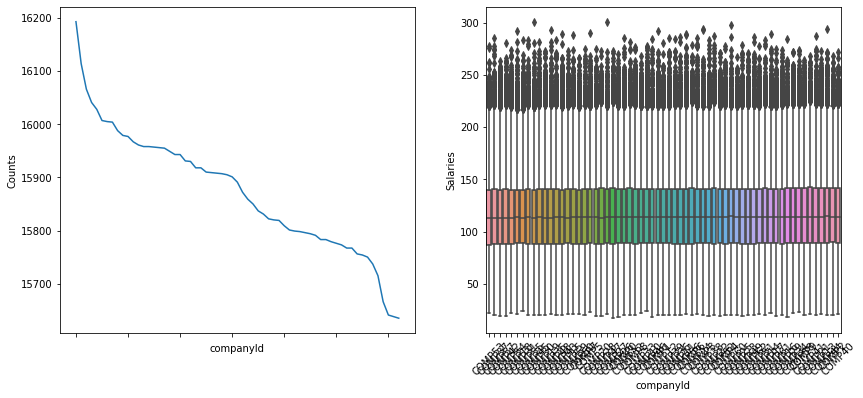

In [26]:
plot_features(train_df, 'companyId')

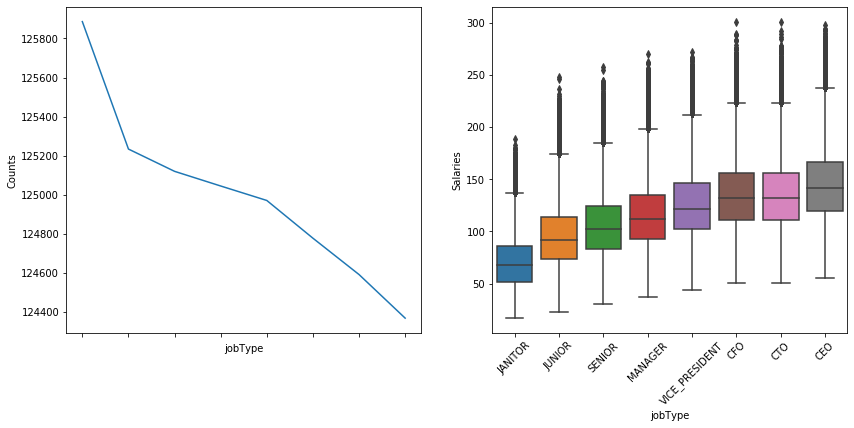

In [27]:
plot_features(train_df, 'jobType')

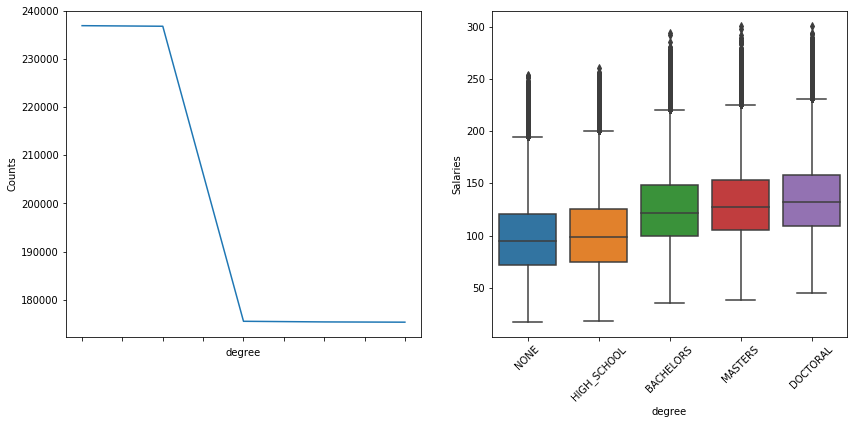

In [28]:
plot_features(train_df, 'degree')

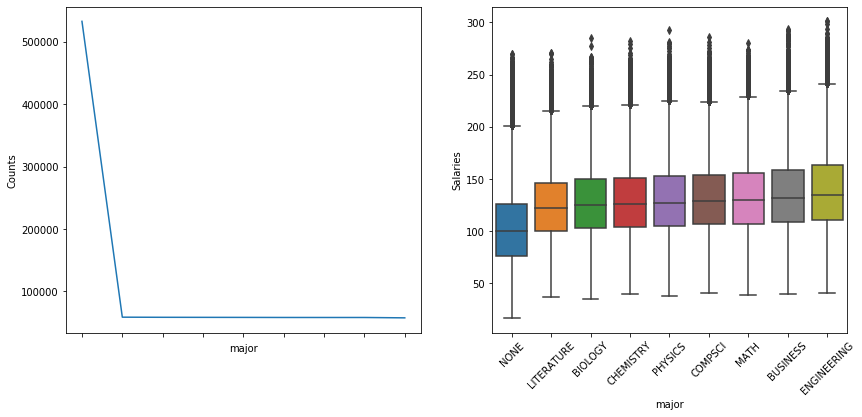

In [29]:
plot_features(train_df, 'major')

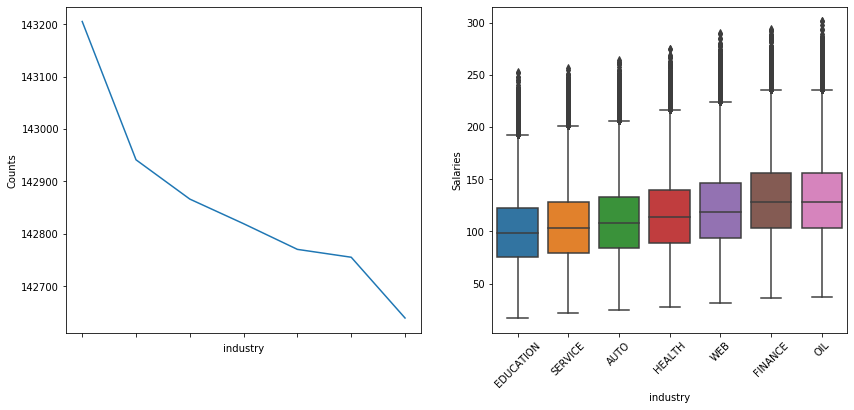

In [30]:
plot_features(train_df, 'industry')

In [31]:
## Summary of numerical features
print("\nSummary of Statistics for numerical columns: ")
display(train_df.describe(include = [np.number]).T)

## Summary of categorical features
print("\nSummary of Statistics for categorical columns: ")
display(train_df[cat_object_type].describe().T)

# just checking size
print("\nTotal features after cleaning data: \n")
print(train_df.shape)


Summary of Statistics for numerical columns: 


,count,mean,std,min,25%,50%,75%,max
yearsExperience,999995.0,11.992407,7.212390,0.0,6.0,12.0,18.0,24.0
milesFromMetropolis,999995.0,49.529381,28.877721,0.0,25.0,50.0,75.0,99.0
salary,999995.0,116.062398,38.717163,17.0,88.0,114.0,141.0,301.0



Summary of Statistics for categorical columns: 


,count,unique,top,freq
jobId,999995,999995,JOB1362685213837,1
companyId,999995,63,COMP39,16193
jobType,999995,8,SENIOR,125886
degree,999995,5,HIGH_SCHOOL,236975
major,999995,9,NONE,532353
industry,999995,7,WEB,143205



Total features after cleaning data: 

(999995, 9)


In [32]:
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


### Drop "jobId" & "companyId" for model training

In [33]:
train_df = train_df.drop(['jobId','companyId'], axis = 1)

In [34]:
train_df.head()

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,CFO,MASTERS,MATH,HEALTH,10,83,130
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


## Saving as 'train.csv' for Modeling

In [35]:
train_df.to_csv('train.csv', index=False)

## Saving as 'test.csv' for Model testing

In [36]:
test_features_df = test_features_df.drop(['jobId','companyId'], axis = 1)
display(test_features_df.head())
test_features_df.to_csv('test.csv', index=False)

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JUNIOR,NONE,NONE,AUTO,20,47
2,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


# Some useful Notes

### Data Standardization
- Standardization is the process of transforming data into a common format.
\begin{align}
standard = \frac{X - \mu}{\sigma}
\end{align}
Here, $X$ is observation, $\mu$ is mean, and $\sigma$ is standard deviation

Following steps can be followed to standarized the data: <br>
1. from sklearn import preprocessing
##### Get column names first
2. names = df.columns
##### Create the Scaler object
3. scaler = preprocessing.StandardScaler()
##### Fit your data on the scaler object
4. scaled_df = scaler.fit_transform(df) <br>
   scaled_df = pd.DataFrame(scaled_df, columns=names)
   
### Data Normalization
- Normalizations include scaling the variable so the variable average is 0, and the variance is 1 i.e., variable value range between 0 and 1.
\begin{align}
normalize = \frac{X - min(X)}{max(X) - min(X)}
\end{align}

Following steps can be followed to normalize the data: <br>
1. from sklearn import preprocessing <br>
   import numpy as np
2. colname_array = np.array(df['COLUMNNAME']) <br>
   normalized_colname = preprocessing.normalize([colname_array])
   
### Binning
- Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis. <br>
- Usually used histogram to analyze the data